# Iris flowers Classification ML project

### Author:- Muhammad Aqib Abdullah

#### The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [3]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns =["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
df.shape

(150, 5)

## Preprocessing the dataset

In [9]:
# checking the null values in the dataset
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


## Exploratory Data Analysis

<Axes: >

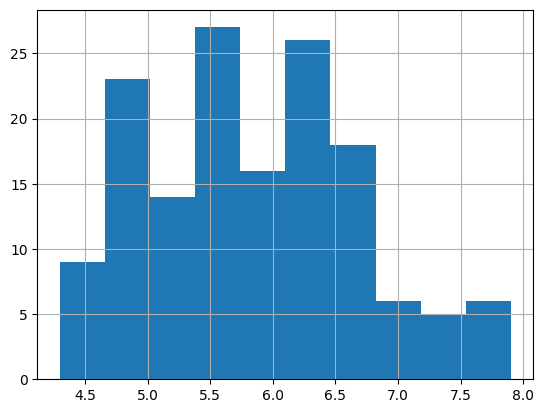

In [10]:
##histogram
df['SepalLengthCm'].hist()

<Axes: >

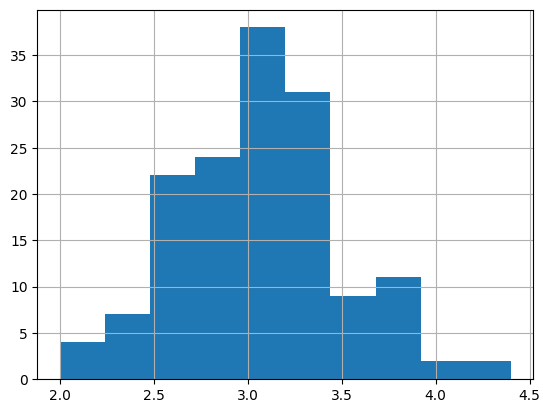

In [11]:
df['SepalWidthCm'].hist()

<Axes: >

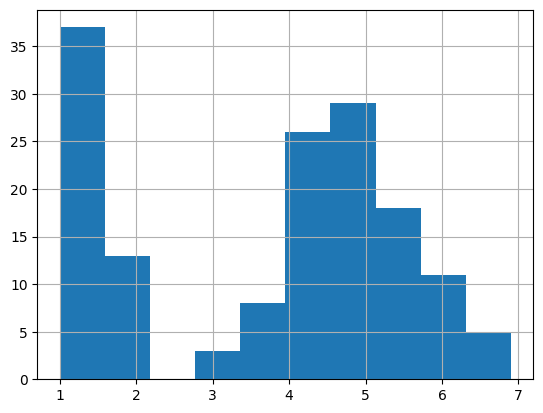

In [12]:
df['PetalLengthCm'].hist()

<Axes: >

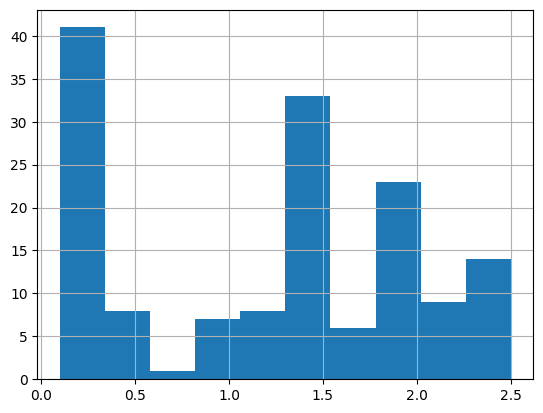

In [13]:
df['PetalWidthCm'].hist()

In [14]:
# Scatterplot
color = ['red','Orange','Blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

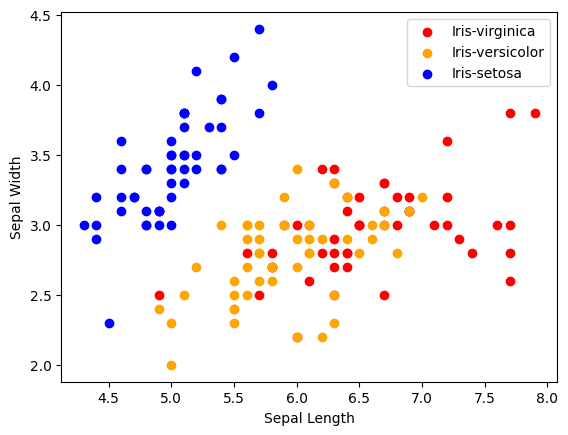

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = color[i], label = species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

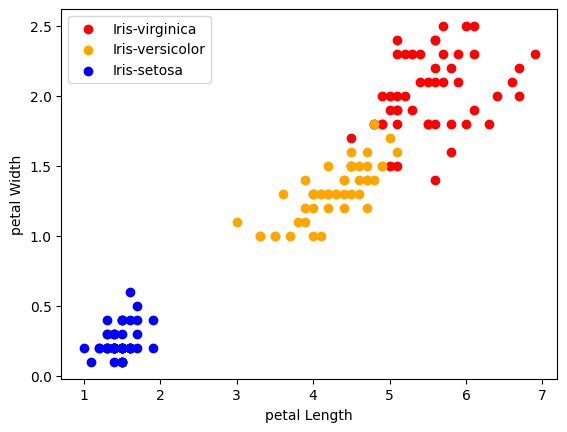

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label = species[i])

plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

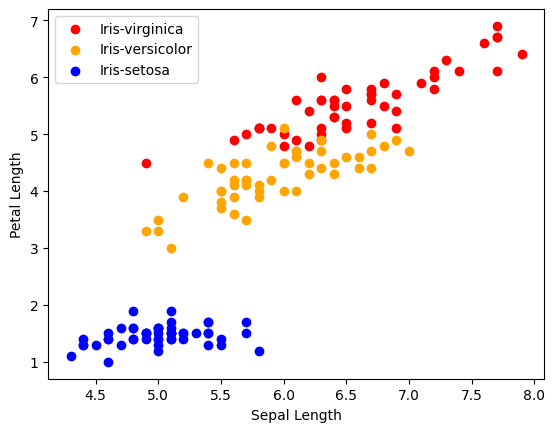

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label = species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

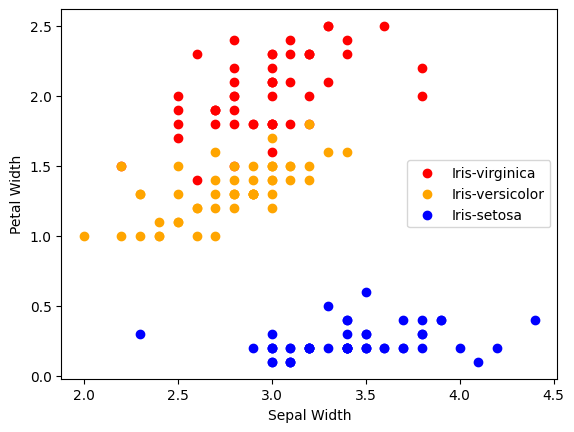

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label = species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation Matrix

In [31]:
# Convert 'Species' column to numeric type before calculating correlation
df['Species'] = pd.to_numeric(df['Species'], errors='coerce')

# Calculate correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,NaN
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,NaN
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,NaN
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,NaN
Species,NaN,NaN,NaN,NaN,NaN


<Axes: >

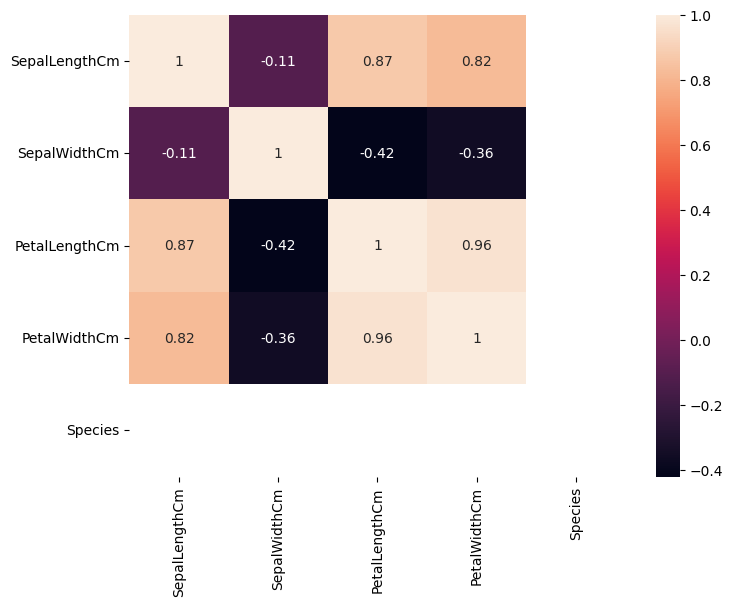

In [32]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, annot = True, ax = ax)

## Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Species"])
Y = df['Species']
# Add stratify parameter to ensure class distribution in train and test sets
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.30, stratify=Y, random_state=42)

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
model.fit(x_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [38]:
# knn - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [39]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


In [41]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [42]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


### Received the accuracy of 97.77 in the test dataset in model.